## NY DATA ANALISYS

### Subtitle

> quote

$s_x-3$

List:
* ded 
* dede

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [7]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time) # convert "Start_time" to time type

In [8]:
df['del_VehHourTrav']=(df['VehHourTrav_ns']-df['VehHourTrav'])/df['VehHourTrav']

In [9]:
df['del_PassHourTrav']=abs((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav'])

In [10]:
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility'])

In [11]:
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']

In [12]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1)

Text(0.5, 1.0, 'DEMAND')

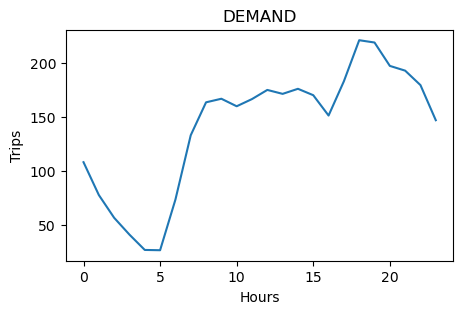

In [9]:
df.groupby(df.Start_time.dt.hour).Demand_size.mean().plot(figsize=(5,3))
plt.xlabel("Hours")
plt.ylabel("Trips")
plt.title("DEMAND")

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

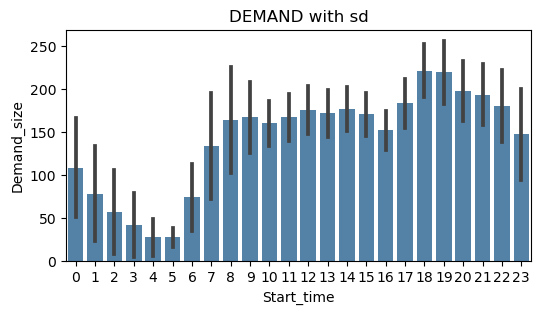

In [10]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
fig, ax = plt.subplots(figsize=(6,3))
ax.set_title('DEMAND with sd')
sns.barplot(data = to_plot, x = df.Start_time.dt.hour, y="Demand_size", ax = ax, errorbar="sd", color='steelblue')
to_plot.Start_time.dt.dayofweek.unique()

Text(0.5, 1.0, 'DEMAND')

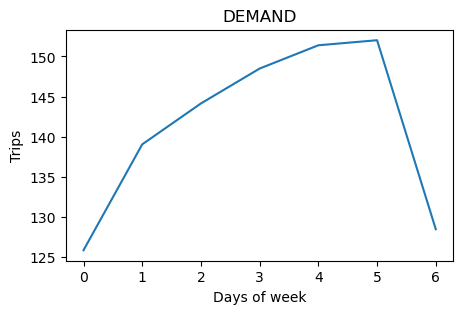

In [11]:
df.groupby(df.Start_time.dt.dayofweek).Demand_size.mean().plot(figsize=(5,3))
plt.xlabel("Days of week")
plt.ylabel("Trips")
plt.title("DEMAND")

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

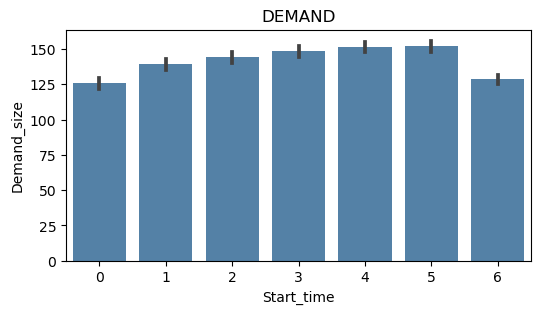

In [12]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
fig, ax = plt.subplots(figsize=(6,3))
ax.set_title('DEMAND')
sns.barplot(data = to_plot, x = df.Start_time.dt.dayofweek, y="Demand_size", ax = ax, color='steelblue')
to_plot.Start_time.dt.dayofweek.unique()

In [13]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
to_plot = df.groupby(df.Start_time.dt.dayofweek)
to_plot.Demand_size.sum()

Start_time
0    156285
1    172683
2    179162
3    184720
4    188933
5    187440
6    158508
Name: Demand_size, dtype: int64

In [14]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
to_plot = df.groupby(df.Start_time.dt.dayofweek)
to_plot.Demand_size.mean()

Start_time
0    125.833333
1    139.036232
2    144.136766
3    148.488746
4    151.388622
5    152.019465
6    128.450567
Name: Demand_size, dtype: float64

Text(0.5, 1.0, 'DEMAND')

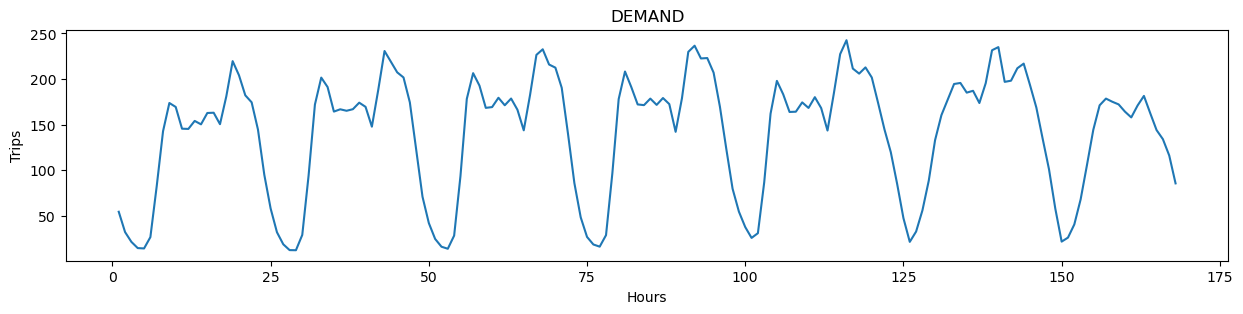

In [15]:
df.groupby(df.Start_time.dt.dayofweek * 24 + (df.Start_time.dt.hour + 1)).Demand_size.mean().plot(figsize=(15,3))
plt.xlabel("Hours")
plt.ylabel("Trips")
plt.title("DEMAND")

#df['date'].dt.dayofweek * 24 + (df['date'].dt.hour + 1)

In [16]:
df['hour_of_week'] = df.Start_time.dt.dayofweek * 24 + (df.Start_time.dt.hour + 1)

In [17]:
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

(0.0, 165.0)

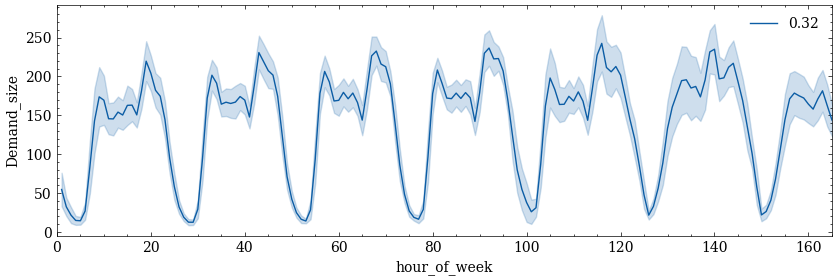

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,3))
df['Hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = 'hour_of_week', y = 'Demand_size', ax = ax, label = d, errorbar ='sd')
ax.set_xlim(0,165)


Text(0.5, 0, 'Demand')

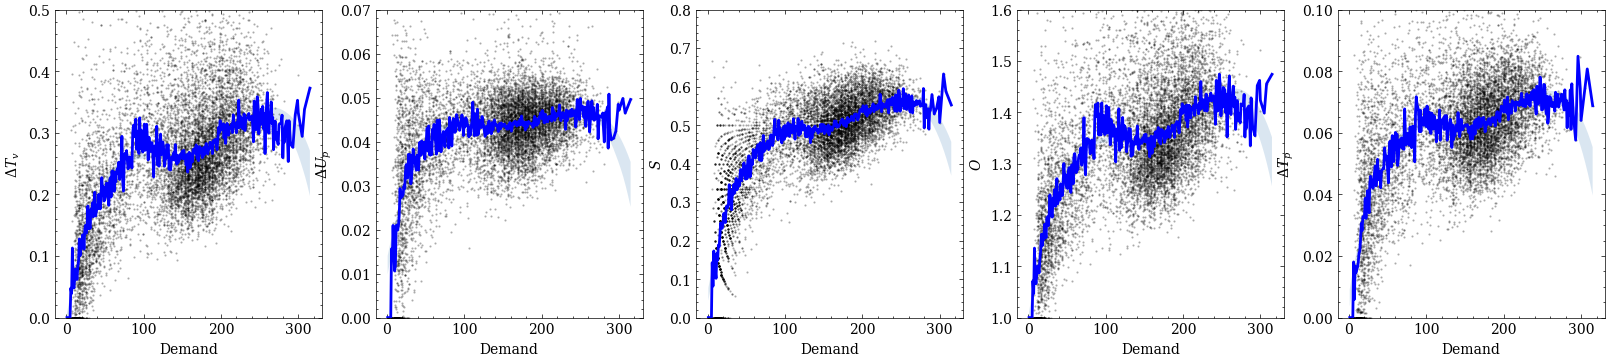

In [19]:
fig, axes = plt.subplots(1,5, figsize = (20,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.5))
ax.set_ylabel("$\Delta T_v$")
ax.set_xlabel("Demand")

ax=axes[1]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_PassUtility.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.07))
ax.set_ylabel("$\Delta U_p$")
ax.set_xlabel("Demand")

ax=axes[2]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).shared_ratio.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$")
ax.set_xlabel("Demand")

ax=axes[3]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).Occupancy.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$")
ax.set_xlabel("Demand")

ax=axes[4]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_PassHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$")
ax.set_xlabel("Demand")


#ax=axes[0][1]
#to_plot = df[(df.Start_time.dt.dayofweek.isin([1,2,3]) 
#    | ((df.Start_time.dt.dayofweek.isin([0])) 
#       & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) 
#    | ((df.Start_time.dt.dayofweek.isin([4])) 
#       & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]))))].groupby(df.Demand_size).del_VehHourTrav.mean()
#to_plot.plot(ax = ax)
#ax.set_ylabel("$\Delta T_v$")
#ax.legend(['WORKING DAY (Mon.5am - Fri.5pm)'])

#to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
#     | ((df.Start_time.dt.dayofweek.isin([4])) 
#        & (df.Start_time.dt.hour.isin([18,19,20,21,22,23]))) 
#     | ((df.Start_time.dt.dayofweek.isin([0])) 
#        & (df.Start_time.dt.hour.isin([0,1,2,3,4]))))].groupby(df.Demand_size).del_VehHourTrav.mean()
#to_plot.plot(ax=ax)
#plt.legend(['Weekend (Fri.5pm - Mon.4am)'])


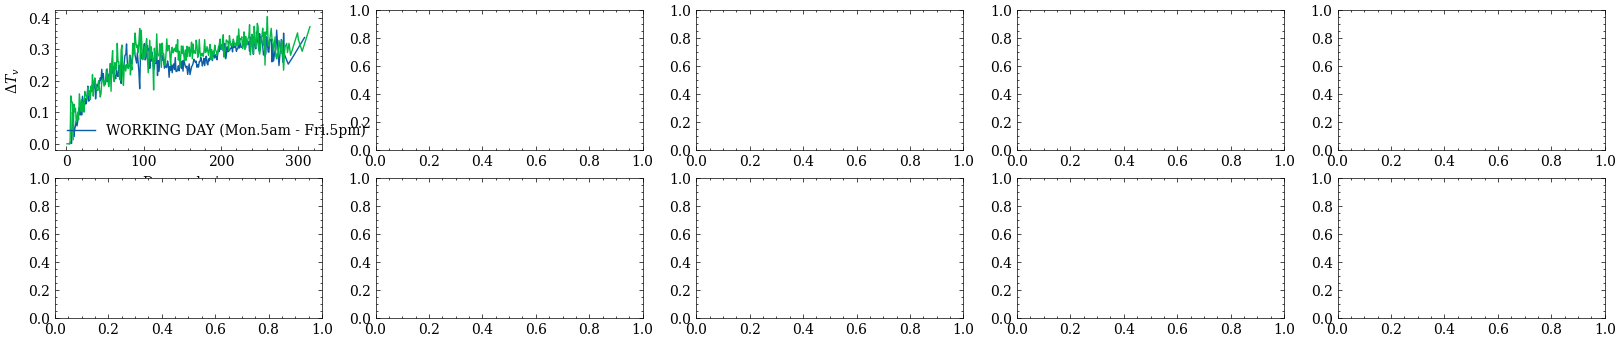

In [20]:
fig, axes = plt.subplots(2,5, figsize = (20,4))
axes = axes.flatten()


ax=axes[0]
to_plot = df[(df.Start_time.dt.dayofweek.isin([1,2,3]) 
    | ((df.Start_time.dt.dayofweek.isin([0])) 
       & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) 
    | ((df.Start_time.dt.dayofweek.isin([4])) 
       & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]))))].groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax)
ax.set_ylabel("$\Delta T_v$")
ax.legend(['WORKING DAY (Mon.5am - Fri.5pm)'])

to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
     | ((df.Start_time.dt.dayofweek.isin([4])) 
        & (df.Start_time.dt.hour.isin([18,19,20,21,22,23]))) 
     | ((df.Start_time.dt.dayofweek.isin([0])) 
        & (df.Start_time.dt.hour.isin([0,1,2,3,4]))))].groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax=ax)
plt.legend(['Weekend (Fri.6pm - Mon.4am)'])


(0.0, 0.5)

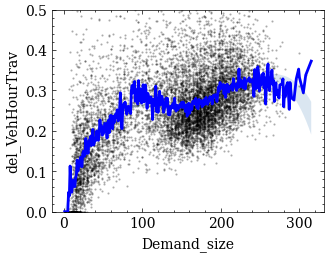

In [21]:
fig, ax = plt.subplots()

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]#.groupby(df.Demand_size).del_VehHourTrav.mean()
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.5))

Text(0.5, 1.0, 'WORKING DAY (Mon.5am - Fri.5pm)')

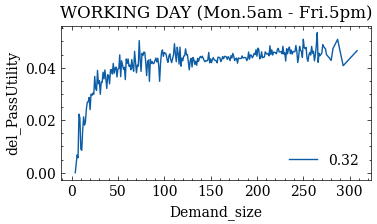

In [22]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) 
    | ((df.Start_time.dt.dayofweek.isin([0])) 
       & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) 
    | ((df.Start_time.dt.dayofweek.isin([4])) 
       & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]))))].groupby(df.Demand_size).del_PassUtility.mean().plot(figsize=(4,2))
plt.ylabel("del_PassUtility")
plt.legend(['0.32'])
plt.title("WORKING DAY (Mon.5am - Fri.5pm)")

Text(0.5, 1.0, 'WEEKEND')

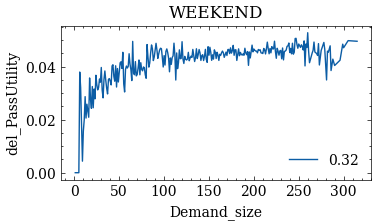

In [23]:
df[(df.Start_time.dt.dayofweek.isin([5,6]) 
     | ((df.Start_time.dt.dayofweek.isin([4])) 
        & (df.Start_time.dt.hour.isin([18,19,20,21,22,23]))) 
     | ((df.Start_time.dt.dayofweek.isin([0])) 
        & (df.Start_time.dt.hour.isin([0,1,2,3,4]))))].groupby(df.Demand_size).del_PassUtility.mean().plot(figsize=(4,2))
plt.ylabel("del_PassUtility")
plt.legend(['0.32'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY (Mon.5am - Fri.5pm)')

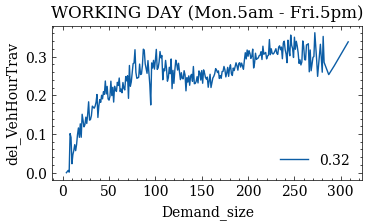

In [24]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) 
    | ((df.Start_time.dt.dayofweek.isin([0])) 
       & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) 
    | ((df.Start_time.dt.dayofweek.isin([4])) 
       & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]))))].groupby(df.Demand_size).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.32'])
plt.title("WORKING DAY (Mon.5am - Fri.5pm)")

Text(0.5, 1.0, 'WEEKEND (Fri.6pm - Mon.4am)')

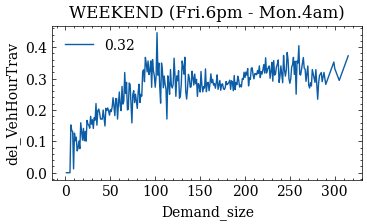

In [25]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10])) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([0,1,2,3,4])))))].groupby(df.Demand_size).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.32'])
plt.title("WEEKEND (Fri.6pm - Mon.4am)")

Text(0.5, 1.0, 'WORKING DAY')

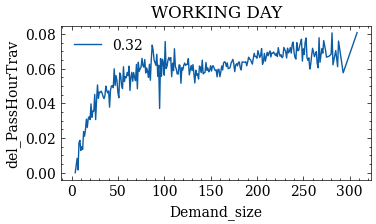

In [26]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))].groupby(df.Demand_size).del_PassHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_PassHourTrav")
plt.legend(['0.32'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

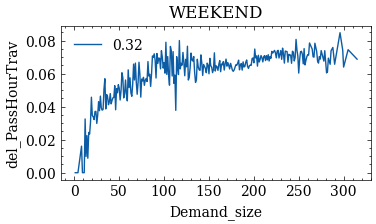

In [27]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10]))))].groupby(df.Demand_size).del_PassHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_PassHourTrav")
plt.legend(['0.32'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

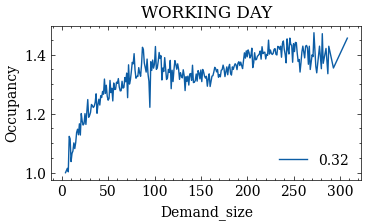

In [28]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))].groupby(df.Demand_size).Occupancy.mean().plot(figsize=(4,2))
plt.ylabel("Occupancy")
plt.legend(['0.32'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

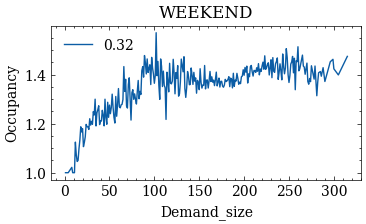

In [29]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10]))))].groupby(df.Demand_size).Occupancy.mean().plot(figsize=(4,2))
plt.ylabel("Occupancy")
plt.legend(['0.32'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

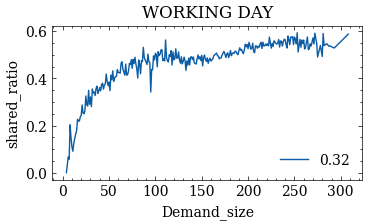

In [30]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))].groupby(df.Demand_size).shared_ratio.mean().plot(figsize=(4,2))
plt.ylabel("shared_ratio")
plt.legend(['0.32'])
plt.title("WORKING DAY")

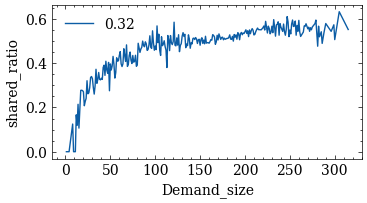

In [31]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10]))))].groupby(df.Demand_size).shared_ratio.mean().plot(figsize=(4,2))
plt.ylabel("shared_ratio")
plt.legend(['0.32'])

Text(0.5, 1.0, 'WORKING DAY')

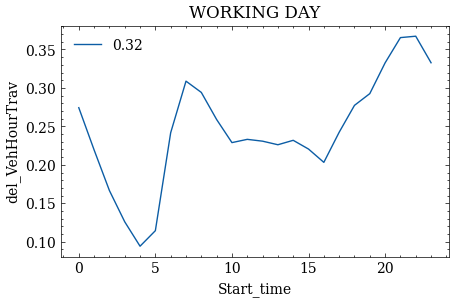

In [32]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(5,3))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.32'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WORKING DAY')

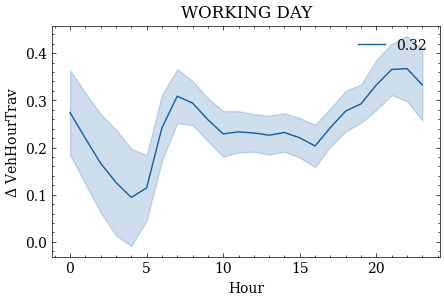

In [33]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['Hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[((df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))) & (df.shared_discount == 0.32)]
    sns.lineplot(data = to_plot, x = 'Hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

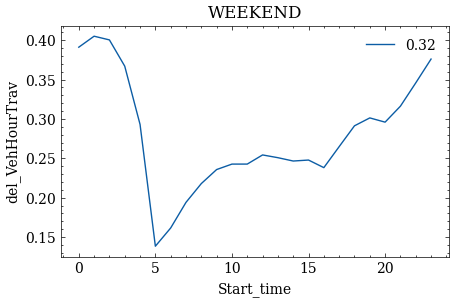

In [34]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10]))))].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(5,3))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.32'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WEEKEND')

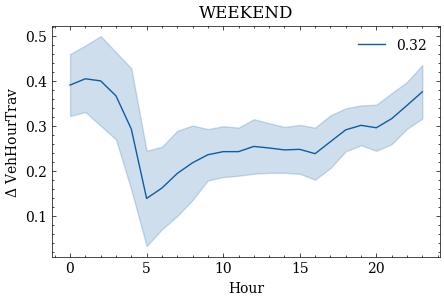

In [35]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['Hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10])))) & (df.shared_discount == 0.32)]
    sns.lineplot(data = to_plot, x = 'Hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav")
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

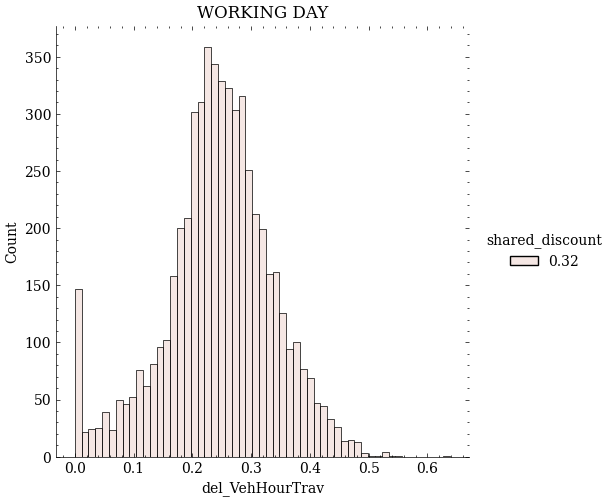

In [36]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')
plt.title("WORKING DAY")


Text(0.5, 1.0, 'WORKING DAY')

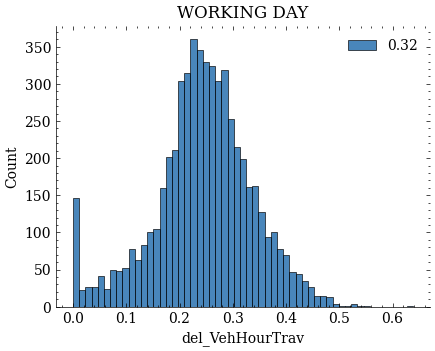

In [37]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 3.5, aspect=1.3)
plt.legend(['0.32'])
plt.title("WORKING DAY")



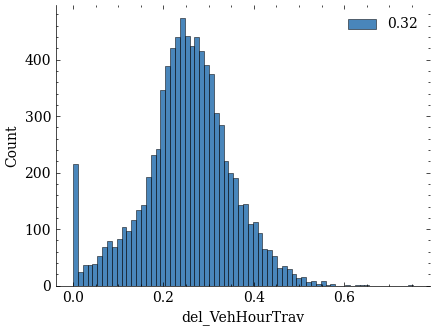

In [38]:
to_plot = df
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 3.5, aspect=1.3)
plt.legend(['0.32'])



Text(0.5, 1.0, 'WORKING DAY (07:00-09:00)')

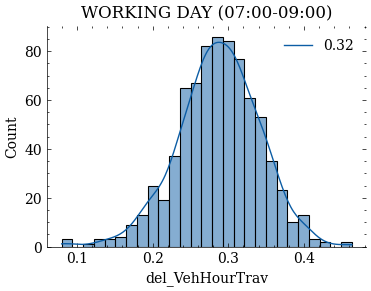

In [39]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', kde=True, height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WORKING DAY (07:00-09:00)")

Text(0.5, 1.0, 'WORKING DAY (15:00-19:00)')

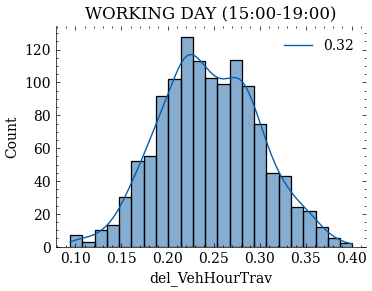

In [40]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3]) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))) | ((df.Start_time.dt.dayofweek.isin([4]) & (df.Start_time.dt.hour.isin([15,16,17,18]))))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', kde=True, height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WORKING DAY (15:00-19:00)")

Text(0.5, 1.0, 'WORKING DAY (23:00-03:00)')

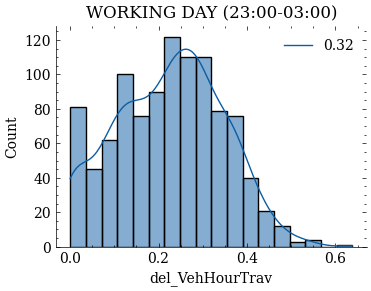

In [41]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([1,2,3]) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,3])))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', kde=True, height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WORKING DAY (23:00-03:00)")

Text(0.5, 1.0, 'WEEKEND (07:00-09:00)')

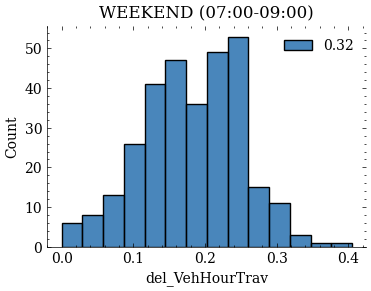

In [42]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WEEKEND (07:00-09:00)")

Text(0.5, 1.0, 'WEEKEND (15:00-19:00)')

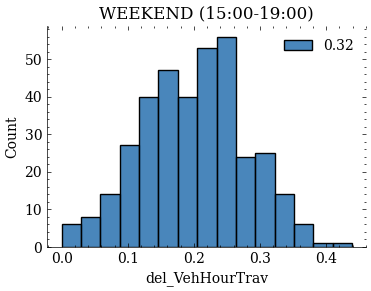

In [43]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) & (df.Start_time.dt.hour.isin([7,8,9]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([19])))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WEEKEND (15:00-19:00)")

Text(0.5, 1.0, 'WEEKEND (23:00-03:00)')

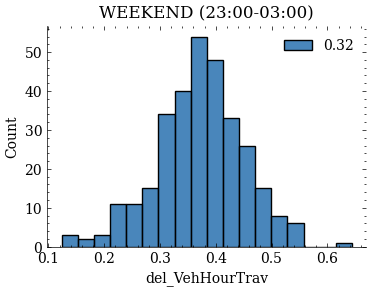

In [44]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5]) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([23]))) | ((df.Start_time.dt.dayofweek.isin([5])) & (df.Start_time.dt.hour.isin([0,1,2,3])))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 2.9, aspect=1.35)
plt.legend(['0.32'])
plt.title("WEEKEND (23:00-03:00)")

Text(0.5, 1.0, 'WEEKEND')

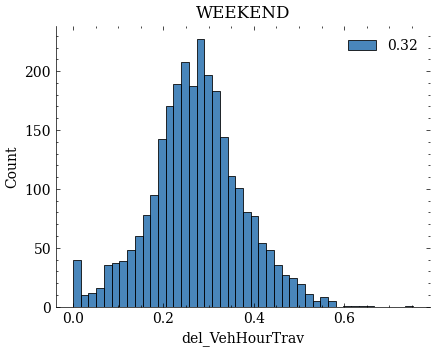

In [45]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10]))))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', height = 3.5, aspect=1.3)
plt.legend(['0.32'])
plt.title("WEEKEND")


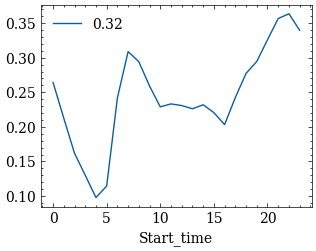

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for d in df.shared_discount.unique():
    df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == d)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(ax = ax, label = d)
plt.legend()

In [47]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pickle

In [49]:

with open(r"single_full_dotmap_29-11-22.obj", "rb") as file:
       results=pickle.load(file)

print(results[0].G.nodes._nodes)

{42421728: {'y': 40.7980478, 'x': -73.9600437, 'highway': 'traffic_signals', 'street_count': 3}, 42421731: {'y': 40.7986542, 'x': -73.9614745, 'highway': 'traffic_signals', 'street_count': 4}, 42421737: {'y': 40.7992437, 'x': -73.9628734, 'highway': 'traffic_signals', 'street_count': 4}, 42421741: {'y': 40.8004295, 'x': -73.9656909, 'highway': 'traffic_signals', 'street_count': 4}, 42421745: {'y': 40.8013981, 'x': -73.9679955, 'highway': 'traffic_signals', 'street_count': 4}, 42421749: {'y': 40.8016404, 'x': -73.9685741, 'highway': 'traffic_signals', 'street_count': 4}, 42421751: {'y': 40.8022679, 'x': -73.9700504, 'street_count': 3}, 42421769: {'y': 40.7826383, 'x': -73.9750067, 'highway': 'traffic_signals', 'street_count': 3}, 42421772: {'y': 40.783828, 'x': -73.9778254, 'highway': 'traffic_signals', 'street_count': 4}, 42421775: {'y': 40.7845691, 'x': -73.9795827, 'highway': 'traffic_signals', 'street_count': 4}, 42421776: {'y': 40.7850271, 'x': -73.9806662, 'highway': 'traffic_sign

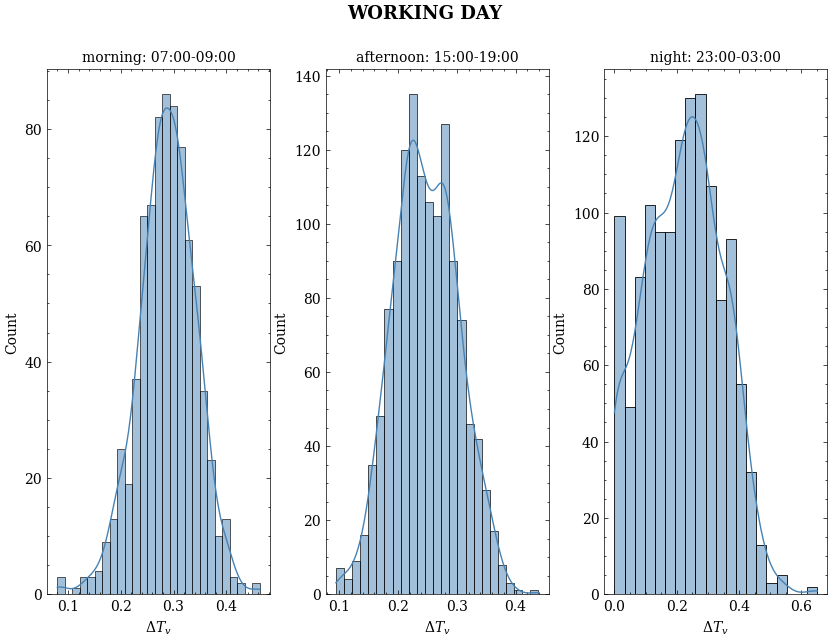

In [53]:

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(8, 7))
ax1 = plt.subplot2grid((1,3), (0,0)) 
ax2 = plt.subplot2grid((1,3), (0,1)) 
ax3 = plt.subplot2grid((1,3), (0,2)) 

ax=ax1 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='steelblue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel("$\Delta T_v$")
ax1.set_title("morning: 07:00-09:00", fontsize=10)

ax=ax2 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([15,16,17,18,19])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='steelblue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel("$\Delta T_v$")
ax2.set_title("afternoon: 15:00-19:00", fontsize=10)

ax=ax3 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([23]))) 
                 | df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([0,1,2,3]))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='steelblue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax3.set_xlabel("$\Delta T_v$")
ax3.set_title("night: 23:00-03:00", fontsize=10)

plt.suptitle('WORKING DAY', ha='left', va='center', fontsize=13, fontweight='bold')
plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=1.1, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.6)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)